In [ ]:
import pandas as pd
import numpy as np
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, confusion_matrix
import statistics
from sklearn.metrics import recall_score

from wordcloud import WordCloud
from collections import Counter

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [ ]:
train = pd.read_csv("//Users/manumitha/Downloads/train2.csv")
test = pd.read_csv("/Users/manumitha/Downloads/test2.csv")
test_y = pd.read_csv("/Users/manumitha/Downloads/test_labels 2.csv")

In [48]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [51]:
train_labels = train[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
no_of_labels = train_labels.sum()

<Axes: title={'center': 'Labels Frequency'}>

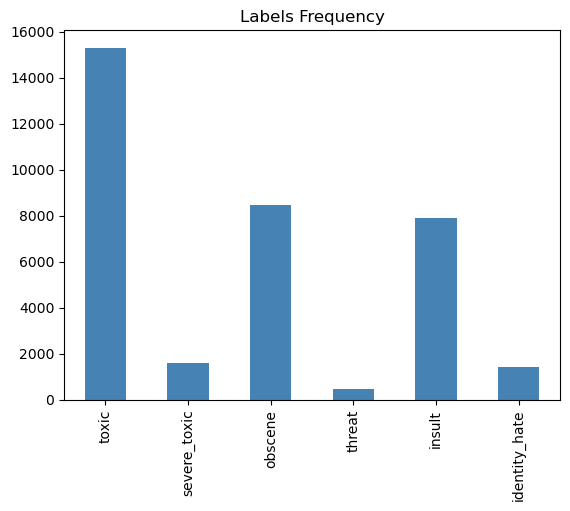

In [52]:
no_of_labels.plot(kind='bar', title='Labels Frequency', color='steelblue')


In [ ]:
# the plot shows that the training set has many instances of label 'toxic' and less instances of label 'threat'

In [53]:
# Below we proceed to perform Feature Engineering and break down the sentences into words

test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

In [54]:
def tokenize(text):
    '''
    Tokenize text and return a non-unique list of tokenized words found in the text. 
    Normalize to lowercase, strip punctuation, remove stop words, filter non-ascii characters.
    Lemmatize the words and lastly drop words of length < 3.
    '''
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    words = nopunct.split(' ')
    # remove any non ascii
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(w) for w in words]
    words = [w for w in words if len(w) > 2]
    return words

In [55]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manumitha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manumitha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
# Below we proceed to use TfidfVectorizer so that the most repeated words do not impact more 


vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=tokenize, stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
X_train = vector.fit_transform(train['comment_text'])
X_test = vector.transform(test['comment_text'])

In [59]:
# we are working with models: Multinomial Naive Bayes, Logistic Regression, Linear Support VEctor Machine 

clf1 = MultinomialNB()
clf2 = LogisticRegression()
clf3 = LinearSVC()

In [62]:
#comparing the three models and evaluating them with the metrices: Recall, F1 score

def cross_validation_score(classifier, X_train, y_train):
   
    methods = []
    name = classifier.__class__.__name__.split('.')[-1]

    for label in test_labels:
        recall = cross_val_score(
            classifier, X_train, y_train[label], cv=10, scoring='recall')
        f1 = cross_val_score(classifier, X_train,
                             y_train[label], cv=10, scoring='f1')
        methods.append([name, label, recall.mean(), f1.mean()])

    return methods

In [63]:
methods1_cv = pd.DataFrame(cross_validation_score(clf1, X_train, train))
methods2_cv = pd.DataFrame(cross_validation_score(clf2, X_train, train))
methods3_cv = pd.DataFrame(cross_validation_score(clf3, X_train, train))

In [64]:
methods_cv = pd.concat([methods1_cv, methods2_cv, methods3_cv])
methods_cv.columns = ['Model', 'Label', 'Recall', 'F1']
meth_cv = methods_cv.reset_index()
meth_cv[['Model', 'Label', 'Recall', 'F1']]

,Model,Label,Recall,F1
0,MultinomialNB,toxic,0.482999,0.636562
1,MultinomialNB,severe_toxic,0.021938,0.042244
2,MultinomialNB,obscene,0.469167,0.622148
3,MultinomialNB,threat,0.000000,0.000000
4,MultinomialNB,insult,0.367020,0.511394
5,MultinomialNB,identity_hate,0.007832,0.015346
6,LogisticRegression,toxic,0.610565,0.731388
7,LogisticRegression,severe_toxic,0.256431,0.351530
8,LogisticRegression,obscene,0.636884,0.747276
9,LogisticRegression,threat,0.123316,0.206632


In [65]:
# From the results of training set, we can see that LinearSVC has performed better compared to Logistic Regression and MultinomialNB. 
# So, we proceed to apply LinearSVC model for the test set, train and observe the results


def score(classifier, X_train, y_train, X_test, y_test):
    """
    Calculate Hamming-loss, F1, Recall for each label on test dataset.
    """
    methods = []
    hloss = []
    name = classifier.__class__.__name__.split('.')[-1]
    predict_df = pd.DataFrame()
    predict_df['id'] = test_y['id']

    for label in test_labels:
        classifier.fit(X_train, y_train[label])
        predicted = classifier.predict(X_test)

        predict_df[label] = predicted

        recall = recall_score(y_test[y_test[label] != -1][label],
                              predicted[y_test[label] != -1],
                              average="weighted")
        f1 = f1_score(y_test[y_test[label] != -1][label],
                      predicted[y_test[label] != -1],
                      average="weighted")

        conf_mat = confusion_matrix(y_test[y_test[label] != -1][label],
                                    predicted[y_test[label] != -1])

        methods.append([name, label, recall, f1, conf_mat])

    hamming_loss_score = hamming_loss(test_y[test_y['toxic'] != -1].iloc[:, 1:7],
                                      predict_df[test_y['toxic'] != -1].iloc[:, 1:7])
    hloss.append([name, hamming_loss_score])

    return hloss, methods

In [66]:
h3, methods3 = score(clf3, X_train, train, X_test, test_y)

In [67]:
methods3 = pd.DataFrame(methods3)
methods3.columns = ['Model', 'Label', 'Recall', 'F1', 'Confusion_Matrix']
meth = methods3.reset_index()
meth[['Model', 'Label', 'Recall', 'F1']]

,Model,Label,Recall,F1
0,LinearSVC,toxic,0.925037,0.929860
1,LinearSVC,severe_toxic,0.992982,0.992775
2,LinearSVC,obscene,0.962815,0.962684
3,LinearSVC,threat,0.996374,0.995989
4,LinearSVC,insult,0.961440,0.959917
5,LinearSVC,identity_hate,0.990497,0.989008


In [68]:
#Visualizing the results for all labels through Confusion Matrix 

def drawConfusionMatrix(cm):
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    ax = plt.axes()
    sns.heatmap(cm,
                annot=True,
                annot_kws={"size": 16},
                cmap="Blues",
                fmt='.2f',
                linewidths=2,
                linecolor='steelblue',
                xticklabels=("Non-toxic", "Toxic"),
                yticklabels=("Non-toxic", "Toxic"))

    plt.ylabel('True', fontsize=18)
    plt.xlabel('Predicted', fontsize=18)
    plt.show()

In [69]:
def Matrix(label):
    labels = {"toxic": 0, "severe_toxic": 1, "obscene": 2,
              "threat": 3, "insult": 4, "identity_hate": 5}

    pos = labels[label]
    for i in range(pos, len(meth), 6):
        print()
        print(f"****  {meth['Model'][i]}  ***")
        cm = meth['Confusion_Matrix'][i]
        drawConfusionMatrix(cm)

Choose a class for the Confusion Matrix: obscene

****  LinearSVC  ***


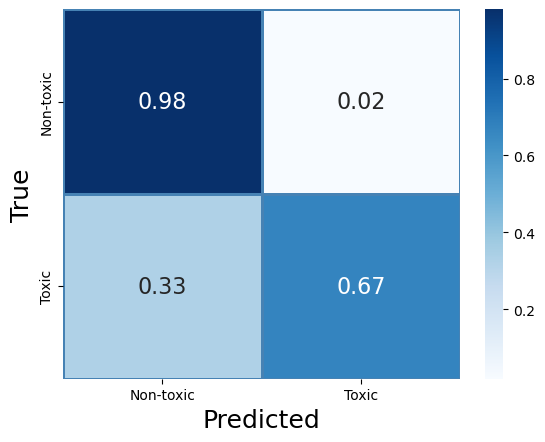

In [70]:
token = input('Choose a class for the Confusion Matrix: ')
Matrix(token.lower())

Choose a class for the Confusion Matrix: toxic

****  LinearSVC  ***


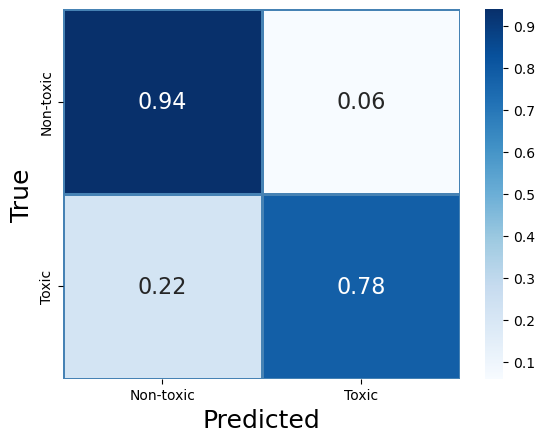

In [71]:
token = input('Choose a class for the Confusion Matrix: ')
Matrix(token.lower())

Choose a class for the Confusion Matrix: severe_toxic

****  LinearSVC  ***


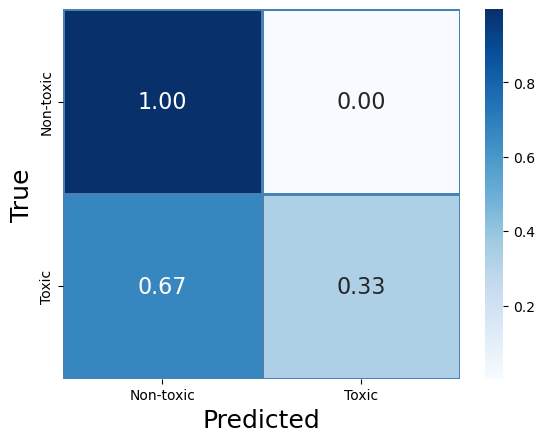

In [72]:
token = input('Choose a class for the Confusion Matrix: ')
Matrix(token.lower())

Choose a class for the Confusion Matrix: threat

****  LinearSVC  ***


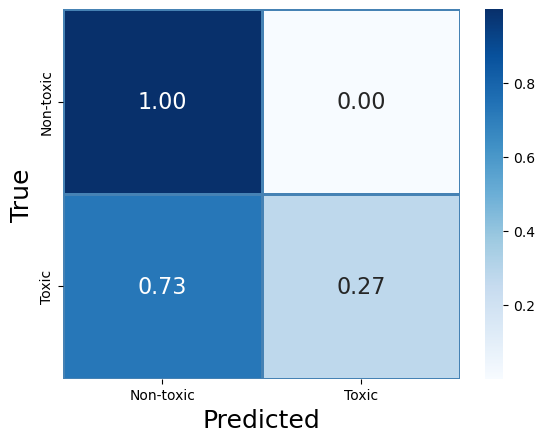

In [73]:
token = input('Choose a class for the Confusion Matrix: ')
Matrix(token.lower())


Choose a class for the Confusion Matrix: insult

****  LinearSVC  ***


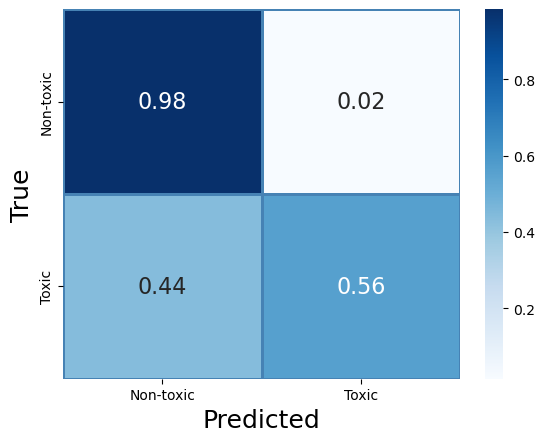

In [74]:
token = input('Choose a class for the Confusion Matrix: ')
Matrix(token.lower())

Choose a class for the Confusion Matrix: identity_hate

****  LinearSVC  ***


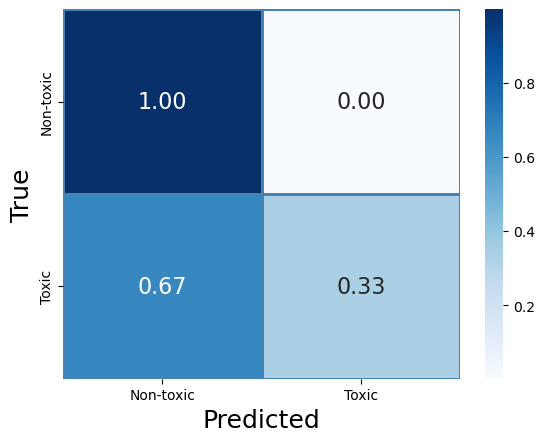

In [75]:
token = input('Choose a class for the Confusion Matrix: ')
Matrix(token.lower())